<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Load and Prepare Data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print (df_train.shape, df_test.shape)
df_train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [4]:
print (df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


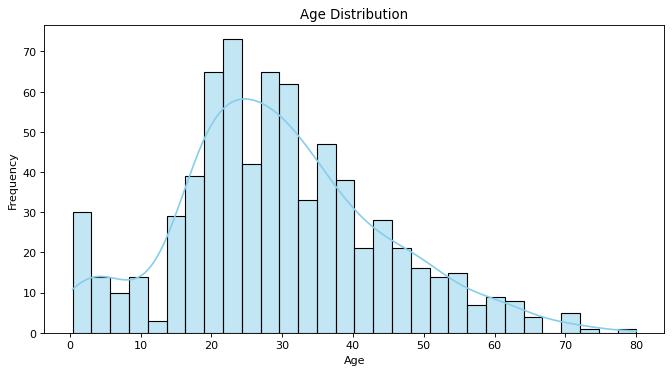

In [5]:
plt.figure(figsize=(10, 5), dpi=80)
sns.histplot(df_train["Age"].dropna(),kde=True, color="skyblue", bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

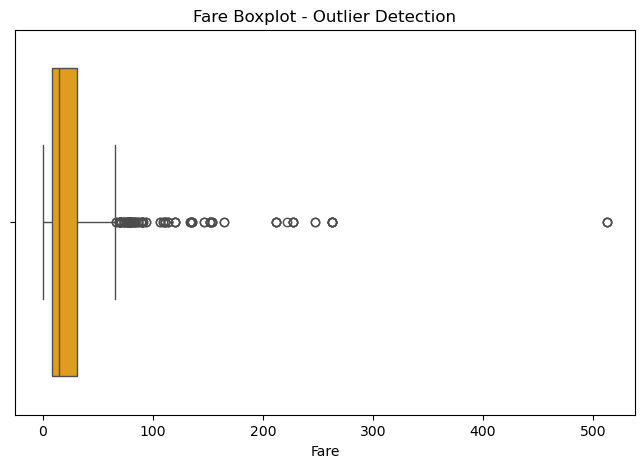

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["Fare"].dropna(), color="orange")
plt.title("Fare Boxplot - Outlier Detection")
plt.xlabel("Fare")
plt.show()

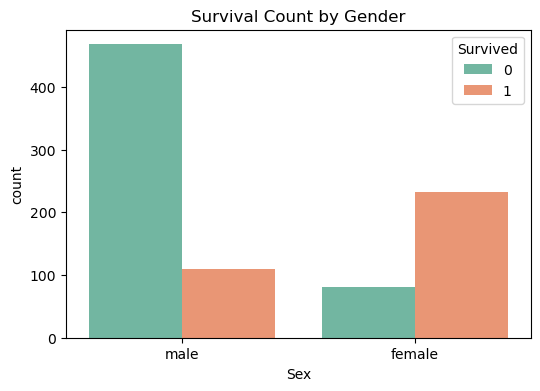

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x="Sex", hue="Survived", palette="Set2")
plt.title("Survival Count by Gender")
plt.show()

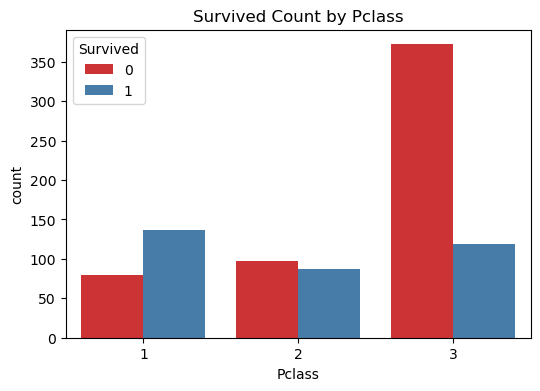

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x="Pclass", hue="Survived", palette="Set1")
plt.title("Survived Count by Pclass")
plt.show()

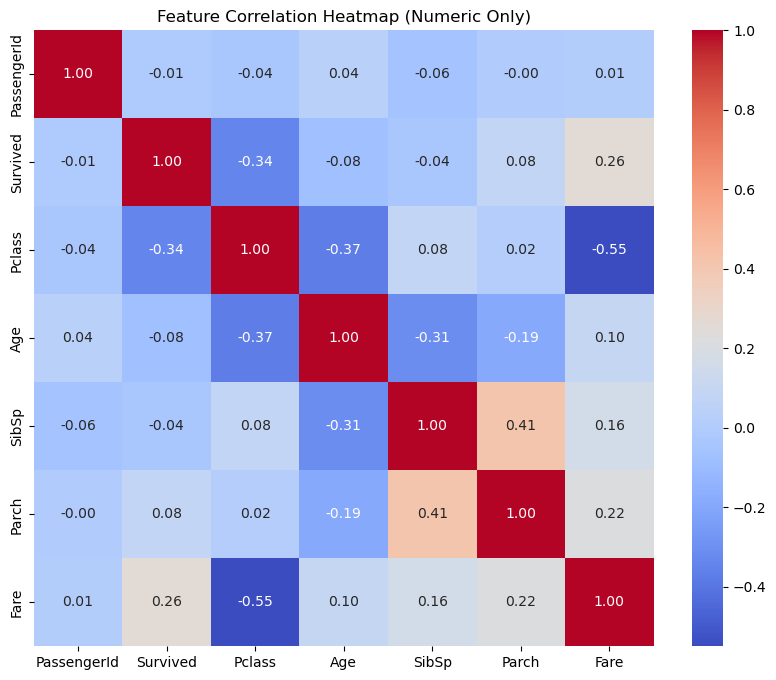

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (Numeric Only)")
plt.show()

## Data Preprocessing

In [15]:
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True)

C:\Users\Tolu\AppData\Local\Temp\ipykernel_13872\424771507.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)
C:\Users\Tolu\AppData\Local\Temp\ipykernel_13872\424771507.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [21]:
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)

df_test["Fare"].fillna(df_test["Fare"].median(), inplace=True)

C:\Users\Tolu\AppData\Local\Temp\ipykernel_13872\2238946958.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Fare"].fillna(df_test["Fare"].median(), inplace=True)


In [22]:
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
df_train.drop(columns=drop_cols, inplace=True)
df_test.drop(columns=drop_cols, inplace=True)

In [23]:
le = LabelEncoder()
cat_features = ["Sex", "Embarked"]

for col in cat_features:
    if col in df_train.columns and col in df_test.columns:
        df_train[col] = le.fit_transform(df_train[col])
        df_test[col] = le.transform(df_test[col])

In [24]:
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

In [25]:
if "PassengerId" in df_test.columns:
    df_test.drop("PassengerId", axis=1, inplace=True)

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_test_scaled = scaler.transform(df_test)

In [27]:
print("Data Preprocessing Complete.")
print(f"Shape after scaling: X_scaled={X_scaled.shape}, y={y.shape}, df_test_scaled={df_test_scaled.shape}")

Data Preprocessing Complete.
Shape after scaling: X_scaled=(891, 7), y=(891,), df_test_scaled=(418, 7)


## Strorytelling - Visualization


--- Final Model Performance Comparison ---
                 Model   ROC_AUC
3        Random Forest  0.890219
0  Logistic Regression  0.880952
1            KNN (k=5)  0.849035
2        Decision Tree  0.803668


C:\Users\Tolu\AppData\Local\Temp\ipykernel_13872\2324272462.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC_AUC', y='Model', data=results_df, palette='viridis')


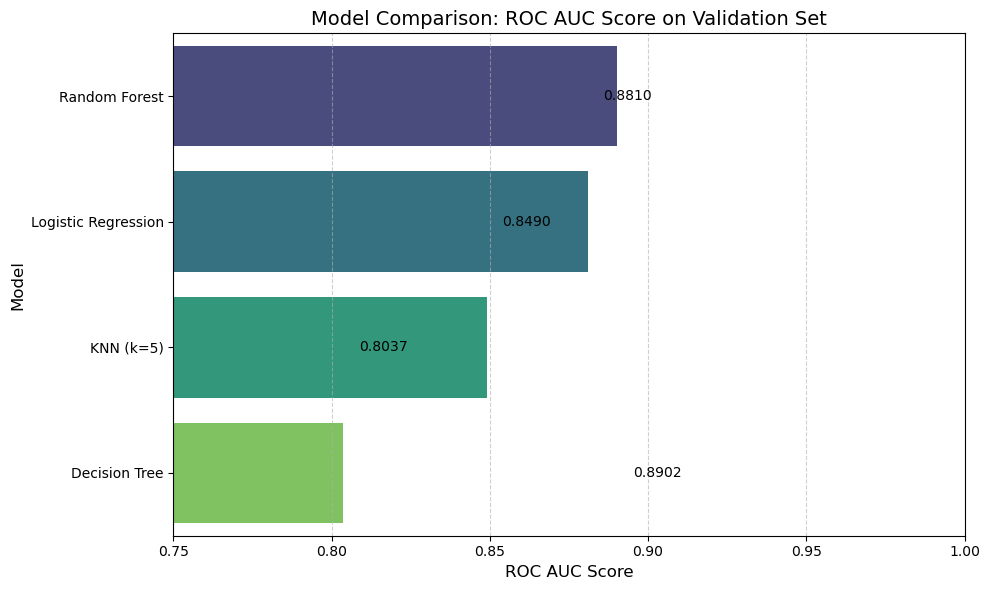

In [60]:
model_names = ['Logistic Regression', 'KNN (k=5)', 'Decision Tree', 'Random Forest']
roc_scores = [roc_rl, roc_knn, roc_dt, roc_rfc]
accuracy_scores = [accuracy_rl, acc_dt, acc_rfc, acc_dt] 
results_df = pd.DataFrame({
    'Model': model_names,
    'ROC_AUC': roc_scores
})

results_df = results_df.sort_values(by='ROC_AUC', ascending=False)

print("\n--- Final Model Performance Comparison ---")
print(results_df)

plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x='ROC_AUC', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison: ROC AUC Score on Validation Set', fontsize=14)
plt.xlabel('ROC AUC Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.75, 1.0) 
plt.grid(axis='x', linestyle='--', alpha=0.6)

for index, row in results_df.iterrows():
    plt.text(row.ROC_AUC + 0.005, index, f"{row.ROC_AUC:.4f}", color='black', ha="left", va="center")

plt.tight_layout()
plt.show()

## Train your model (Classification)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
pred_lr_val = lr.predict(X_test)
accuracy_rl = accuracy_score(y_test, pred_lr_val)
f1_rl = f1_score(y_test, pred_lr_val)
roc_rl = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn_val = knn.predict(X_test)
accuracy_knn = roc_auc_score(y_test, pred_knn_val)
f1_knn = f1_score(y_test, pred_knn_val)
roc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

In [47]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt_val = dt.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt_val)
f1_dt = f1_score(y_test, pred_dt_val)
roc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

In [48]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
pred_rfc_val = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, pred_rfc_val)
f1_rfc = f1_score(y_test, pred_rfc_val)
roc_rfc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

In [49]:
print(f"LR Validation Accuracy: {accuracy_rl:.4f}")
print(f"KNN Validation Accuracy: {accuracy_knn:.4f}")
print(f"DT Validation Accuracy: {acc_dt:.4f}")
print(f"RFC Validation Accuracy: {acc_rfc:.4f}")

LR Validation Accuracy: 0.8101
KNN Validation Accuracy: 0.7867
DT Validation Accuracy: 0.8045
RFC Validation Accuracy: 0.8156


In [50]:
final_model = rfc
final_model.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

## Test Result

In [57]:
test_predictions = final_model.predict(df_test_scaled)

if 'original_test_ids' in locals():
    submission_df = pd.DataFrame({
        'PassengerId': original_test_ids,
        'Survived': test_predictions
    })
else:
    submission_df = pd.DataFrame({
        'PassengerId': range(892, 892 + len(df_test_scaled)),  
        'Survived': test_predictions
    })

print("Test Results Generated.")
print(f"First 5 Predictions:\n{submission_df.head(5)}")


Test Results Generated.
First 5 Predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
